In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import FormatStrFormatter

sns.set_theme()
save_fig = False

In [ ]:
def load_optims(zad_id):
    optimums = pd.read_csv(f'../Results/zad_{zad_id}_optims.csv', sep=';')
    return optimums

In [ ]:
def plot_metrics_boxplot(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(1, len(problem_names), figsize=(18, 4))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            data_to_plot = []
            models = []
            for gr_id, (group_name, group) in enumerate(groupby):
                genes_groups = group.sort_values(['genes']).groupby('genes')
                x = list(genes_groups.genes.groups.keys())#.tolist()
                y = genes_groups[metric].median().tolist()
                # print(x, y)
                model_name = model_names[group_name]
                ax[index].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                ax[index].set_title(problem_name)
                ax[index].legend()
                
                ax[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                ax[index].set_xlabel('Liczba genów')
                #ax[index].set_ylabel(f'Mediana {metric}')
                
                
            ax[index].boxplot(data_to_plot)
            ax[index].set_title(problem_name)
            ax[index].legend()
            ax[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            print(models)
            ax[index].set_xticks(np.arange(1, len(models) + 1, 1), models)
            ax[index].set_xlabel('Metoda')
            
#                 if metric == 'bestValue':
#                     optimums = load_optims(zad_id)
#                     opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
#                     groupby = opts.sort_values(['genes']).groupby(['genes']).median()
#                     opts = groupby.maxVal

                    # ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Plots/zad_{zad_id}_{problem_k}_{metric}.jpg')
        else:
            print(metric)
            plt.show()

## LAB4ZAD1

In [196]:
def plot_metrics_4_1(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            x_ticks = []
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                x_ticks.append(x[0])
                
                y = param_groups[metric].median().tolist()
                # print(x, y)
                #model_name = model_names[group_name]
                ax[index//3, index%3].plot(x, y, f'{markers[gr_id]}-', linewidth=2, markersize=7)
            ax[index//3, index%3].set_title(problem_name)
            #ax[index].legend()

            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax[index//3, index%3].set_xticks(x_ticks, rotation = 60)
            #ax[index].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xlabel('Liczba genów')
                #ax[index].set_ylabel(f'Mediana {metric}')
            
#                 if metric == 'bestValue':
#                     optimums = load_optims(zad_id)
#                     opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
#                     groupby = opts.sort_values(['genes']).groupby(['genes']).median()
#                     opts = groupby.maxVal

#                     ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Plots/zad_{zad_id}_{problem_k}_{metric}.jpg')
        else:
            print(metric)
            plt.show()

IndexError: list index out of range

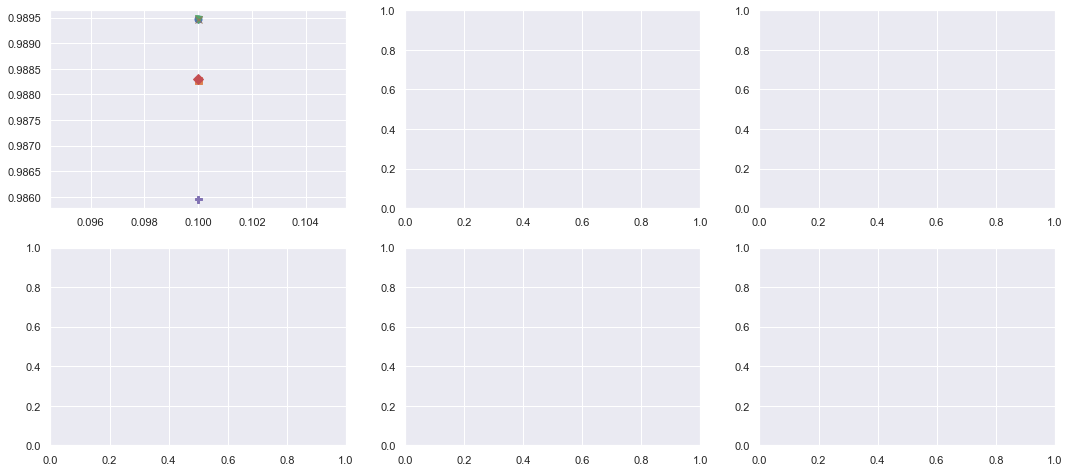

In [197]:
problem_names = {'Max3SAT': 'Max3SAT', 
                 'ISG': 'ISG',
                 'NKLandscapes': 'NK-land',
                 'Concatenation_10': 'Concatenation_10',
                 'Concatenation_50': 'Concatenation_50',
                 'Concatenation_100': 'Concatenation_100',
                }


model_names = {
    10: 10,
    50: 50,
    100: 100,
    200: 200,
    500: 500,
    1000: 1000,
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics_4_1(1, problem_names, model_names, metrics)

## LAB 4 ZAD 2

In [198]:
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

def plot_metrics_4_2(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['param1', 'param2'])
            results = np.zeros(shape=(11, 11))
            
            for gr_id, ((crossProb, mutProb), group) in enumerate(groupby):
                param_groups = group.sort_values(['param1', 'param2']).groupby(['param1', 'param2'])
                x = crossProb
                y = mutProb
                results[int(10*x), int(10*y)] = round(param_groups[metric].median().tolist()[0], 2)
            labels = np.arange(0, 1.1, 0.1).tolist()
            labels = [round(x, 1) for x in labels]
            results = pd.DataFrame(results, index = labels, columns = labels)

            g = sns.heatmap(results, annot=True, annot_kws={"fontsize": 11}, fmt='g', cmap="YlOrBr_r", ax=ax[index//3, index%3])
            
            column_max = results.idxmax(axis=0)
            best_res = -123456 #15235235
            BESTS = []
            for col, variable in enumerate(labels):
                position = results.index.get_loc(column_max[variable])
                if best_res < results.iloc[position, col]:
                    best_ids = (col, position)
                    best_res =  results.iloc[position, col]
                    BESTS = []
                    BESTS.append(best_ids)
                elif best_res == results.iloc[position, col]:
                    BESTS.append(best_ids)
            
            for best_ids in BESTS:
                ax[index//3, index%3].add_patch(Rectangle(best_ids, 1, 1, fill=False, edgecolor='red', lw=3))
            ax[index//3, index%3].set_xlabel('Prawdopodobienstwo mutacji')
            ax[index//3, index%3].set_ylabel('Prawdopodobienstwo krzyzowania')


        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Plots/zad_{zad_id}_{problem_k}_{metric}.jpg')
        else:
            print(metric)
            plt.show()

bestValue


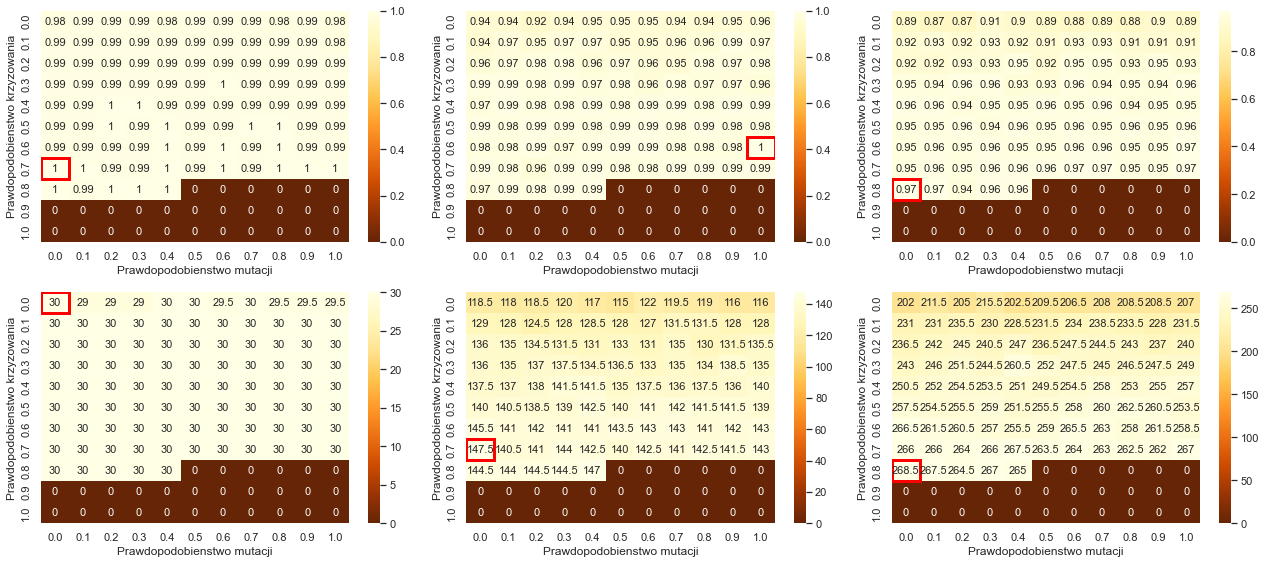

bestTime


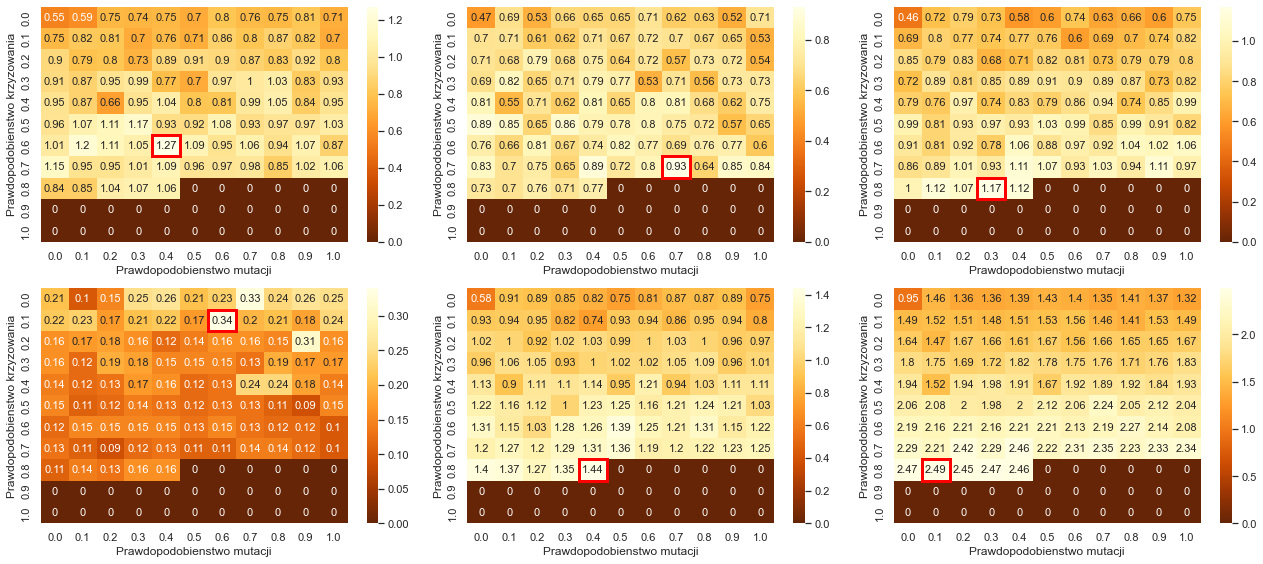

bestIteration


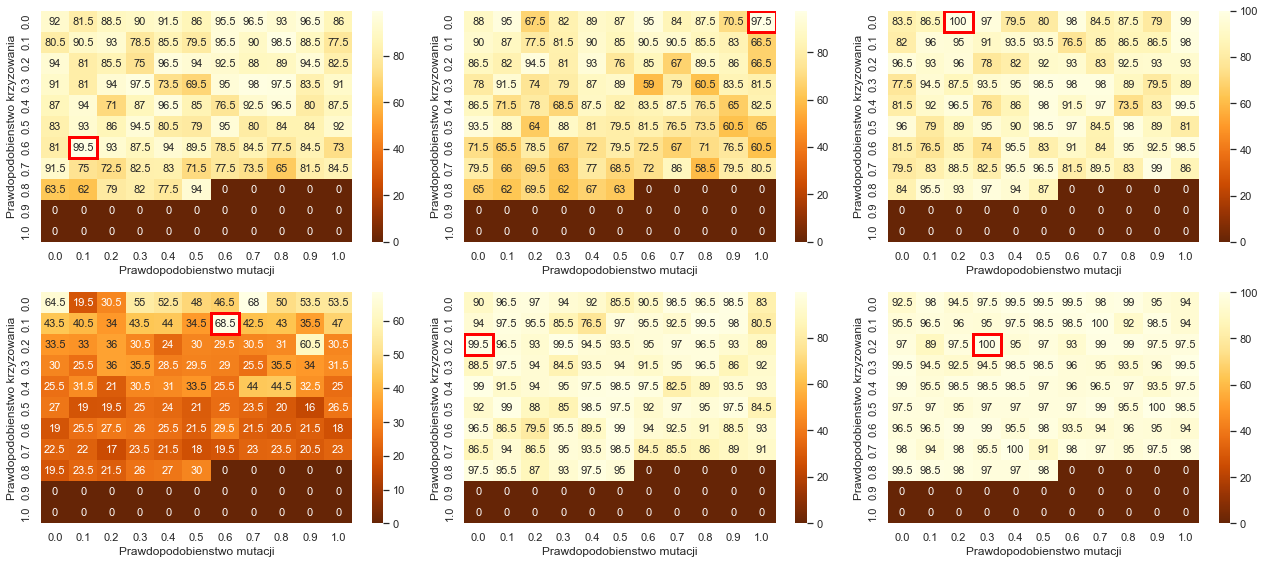

bestFFE


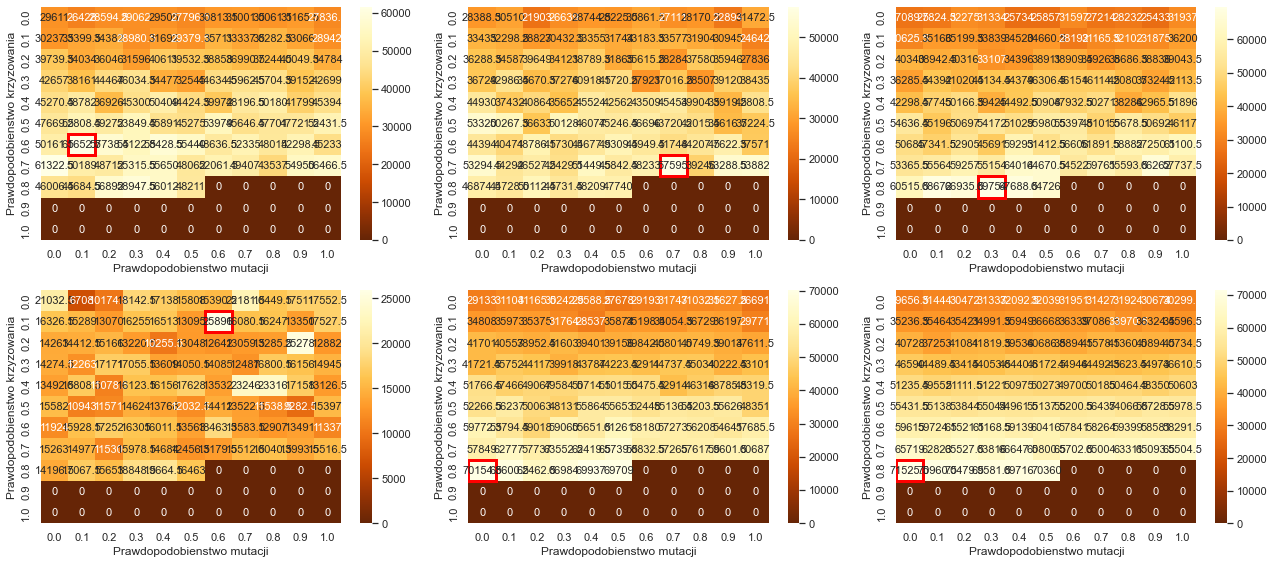

In [199]:
problem_names = {'Max3SAT': 'Max3SAT', 
                 'ISG': 'ISG',
                 'NKLandscapes': 'NK-land',
                 'Concatenation_10': 'Concatenation_10',
                 'Concatenation_50': 'Concatenation_50',
                 'Concatenation_100': 'Concatenation_100',
                }


model_names = {
    10: 10,
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics_4_2(1, problem_names, model_names, metrics)